In [78]:
import pandas as pd

In [79]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv', sep=';')
dados.head(100)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
95,Apartamento,Cosme Velho,3,4,0,130,5500.0,1407.0,246.0
96,Apartamento,Bonsucesso,2,1,0,77,1500.0,740.0,NaN
97,Apartamento,Barra da Tijuca,3,2,2,85,2500.0,1400.0,190.0
98,Apartamento,Todos os Santos,3,1,1,78,1450.0,630.0,73.0


In [80]:
# Quantidade de linhas e conulas
dados.shape

# Colunas
dados.columns

# informação sobre as colunas
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


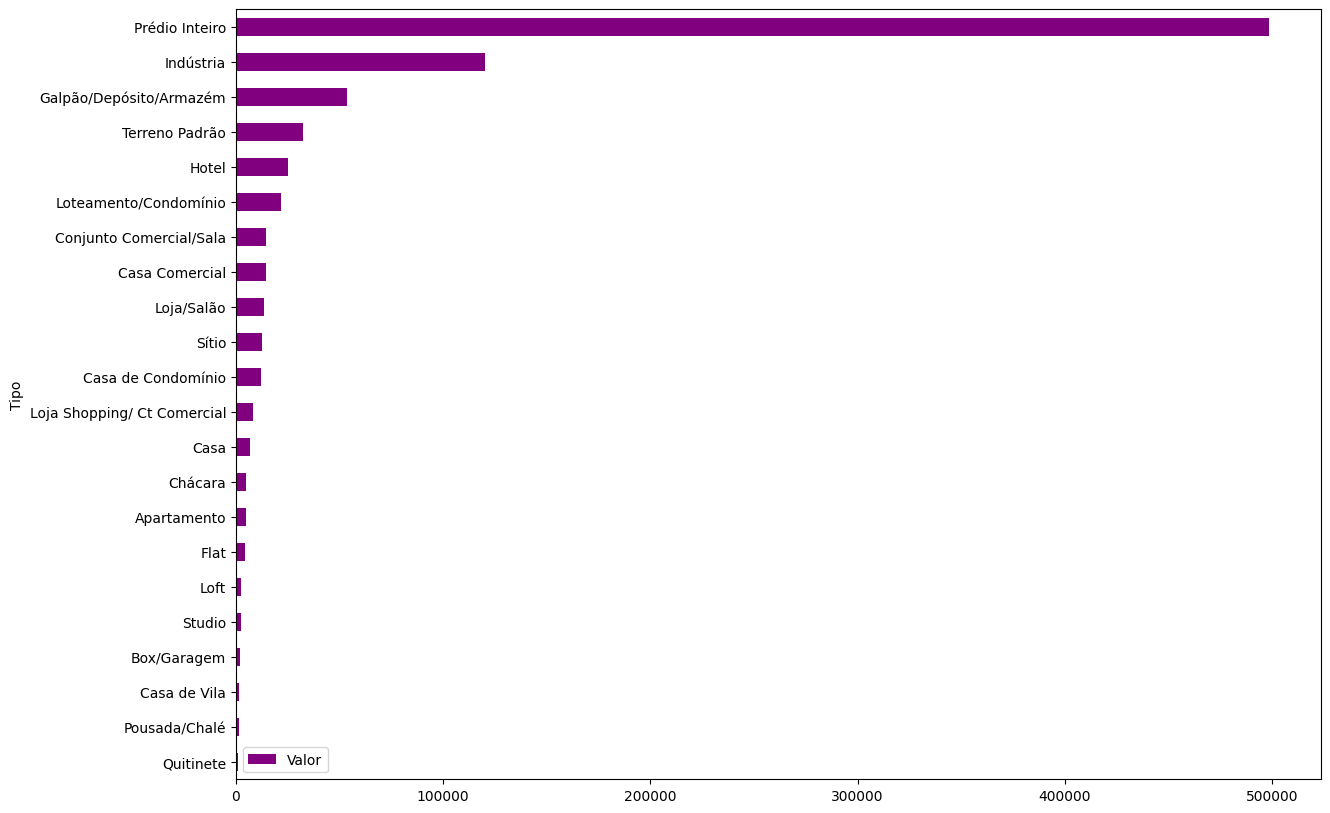

In [81]:
# media de Aluguel por Tipo do maior para o menor
media_por_tipo = dados.groupby('Tipo')[['Valor']].mean().round().sort_values('Valor')

df_preco_barra = media_por_tipo.plot(kind='barh',figsize=(14,10), color='purple')



In [82]:
# retirando os imoveis comerciais

dados['Tipo'].unique() 

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [83]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


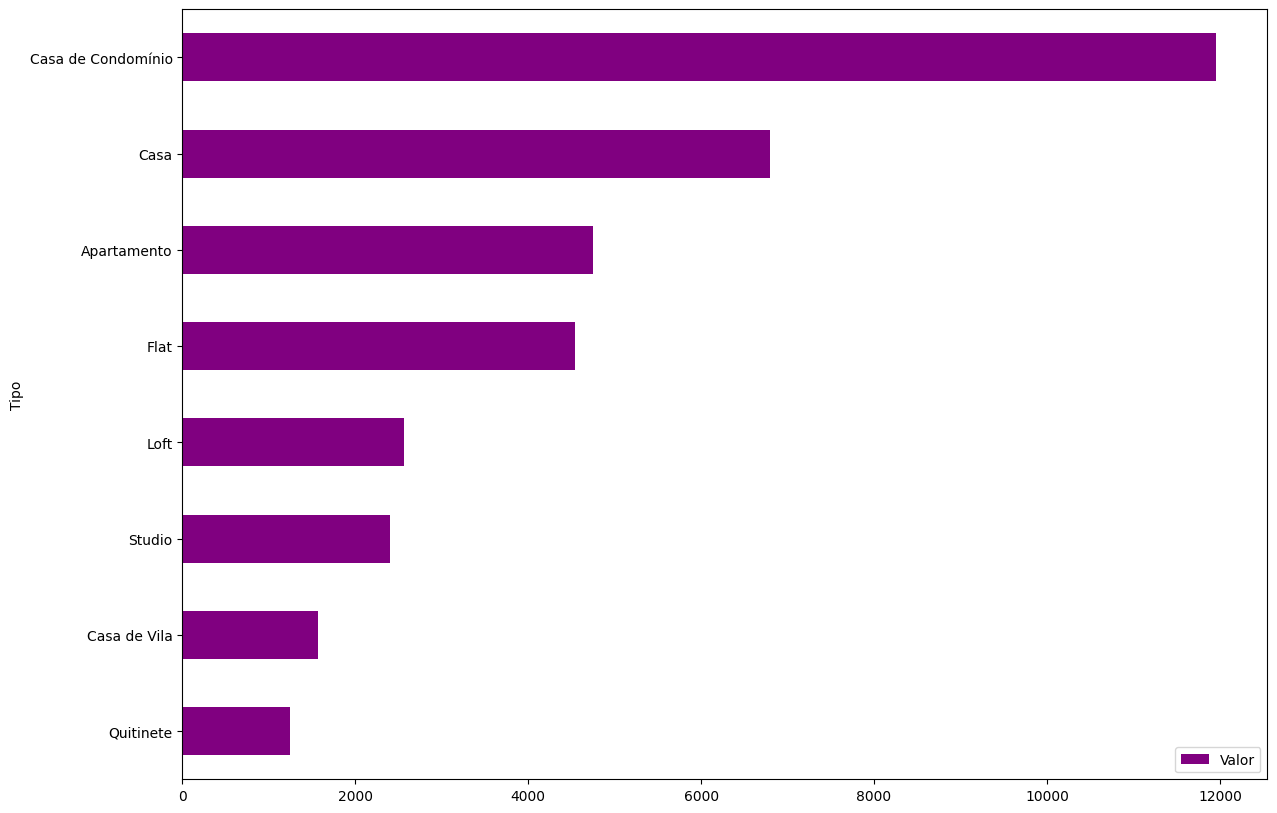

In [84]:
media_por_tipo = df.groupby('Tipo')[['Valor']].mean().round().sort_values('Valor')
df_preco_barra = media_por_tipo.plot(kind='barh',figsize=(14,10), color='purple')


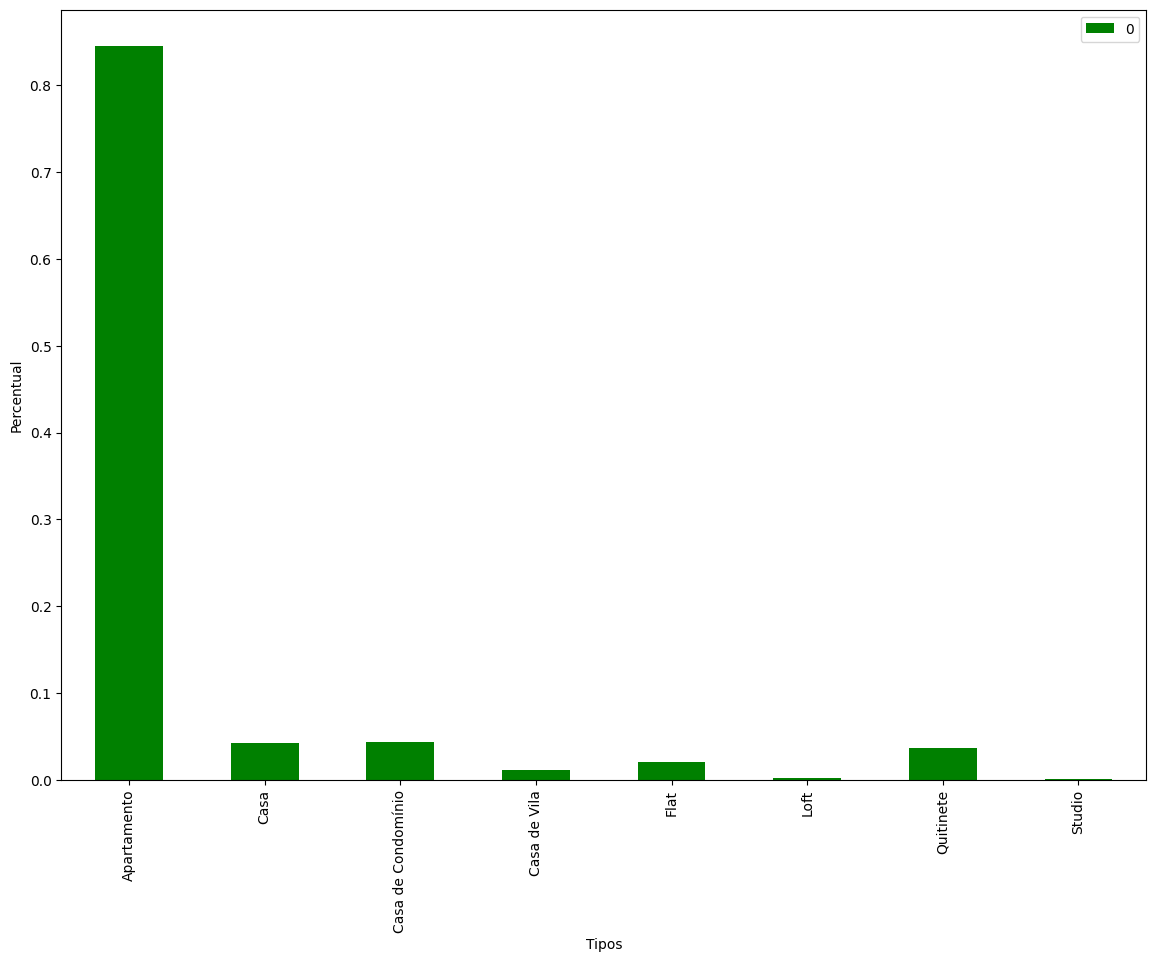

In [85]:
# contagem de cada tipo
df_percentual_tipo = df.value_counts('Tipo', normalize=True).to_frame().sort_values('Tipo')
df_preco_barra = df_percentual_tipo.plot(kind='bar',figsize=(14,10), color='green', xlabel='Tipos', ylabel='Percentual')





In [86]:
df = df.query('Tipo == "Apartamento"')
df.head(100)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
164,Apartamento,Botafogo,3,1,1,100,5500.0,1300.0,220.0
165,Apartamento,Barra da Tijuca,4,2,3,320,5500.0,2700.0,800.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,NaN,NaN
167,Apartamento,Recreio dos Bandeirantes,2,1,1,75,1000.0,1040.0,112.0


In [87]:
# 1) Calcular a média de quartos por apartamento;
df['Quartos'].mean()

2.481568707761622

In [88]:
# 2) Conferir quantos bairros únicos existem na nossa base de dados;
len(df['Bairro'].unique())


149

In [89]:
# 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;
bairro_nobres = df.groupby('Bairro')[['Valor']].sum().sort_values('Valor', ascending=False) 
bairro_nobres

,Valor
Bairro,
Barra da Tijuca,18660089.0
Ipanema,16773379.0
Copacabana,10958535.0
Leblon,10719462.0
Botafogo,7373566.0
...,...
Saúde,1300.0
Ricardo de Albuquerque,1020.0
Parque Anchieta,1000.0


<Axes: xlabel='Bairro', ylabel='Valor'>

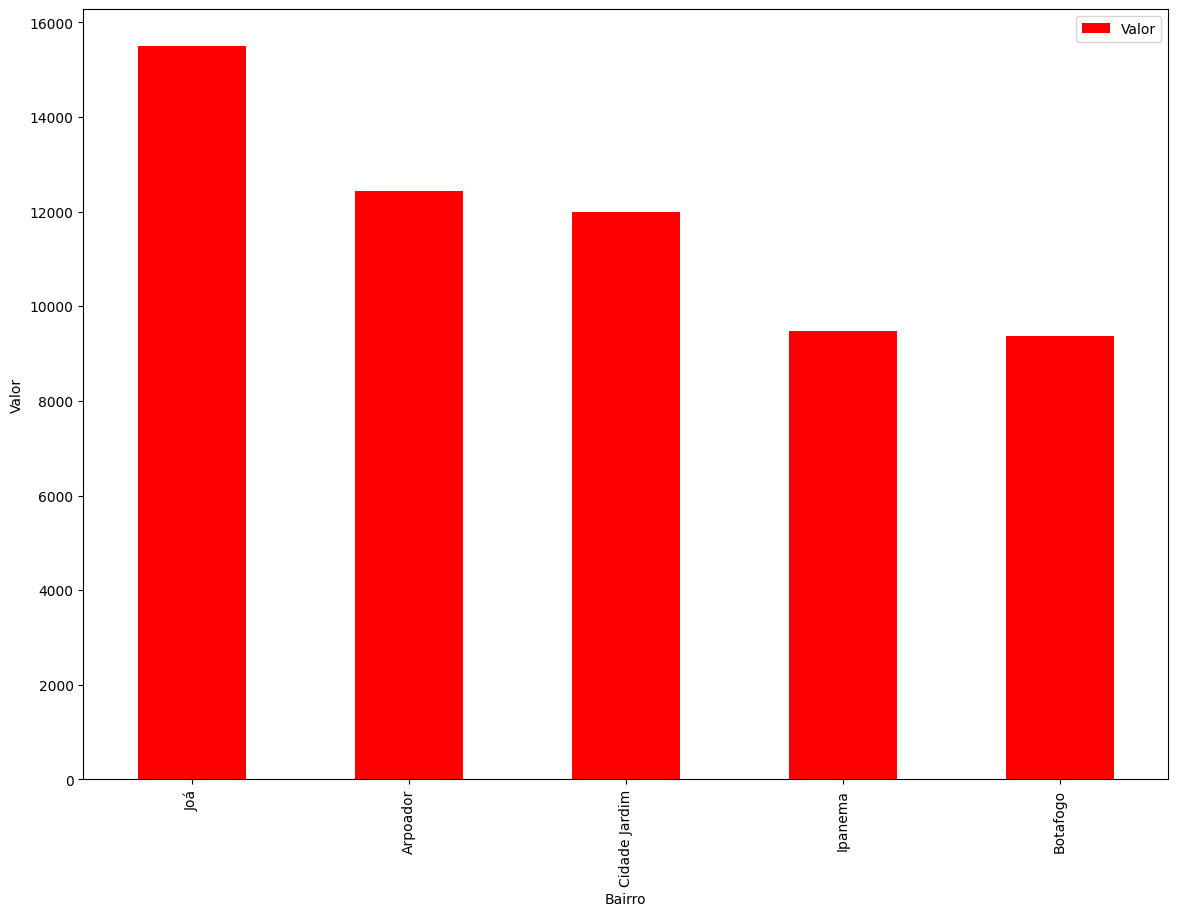

In [90]:
df_bairros = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head()
df_preco_barra = df_bairros.plot(kind='bar',figsize=(14,10), color='red', xlabel='Bairro', ylabel='Valor')
df_preco_barra

In [91]:
# tratamento de valores nulos numericos
df.isnull().sum()
df = df.fillna(0)

In [92]:
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

In [93]:
# Removendo linhas com Valor ou Condominio = 0

registros_a_remover = df.query('Valor == 0 | Condominio == 0').index
df.drop(registros_a_remover, axis=0,inplace=True)

df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [94]:
df.drop('Tipo', axis=1, inplace=True)

In [95]:
df

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Méier,2,0,0,70,900.0,490.0,48.0
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [96]:
# Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200;
df.query('Quartos == 1 & Condominio  <= 1200')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
...,...,...,...,...,...,...,...,...
32915,Flamengo,1,0,0,48,2200.0,478.0,0.0
32918,Ipanema,1,0,0,55,2000.0,630.0,19.0
32922,Barra da Tijuca,1,1,0,62,1700.0,945.0,180.0
32938,Copacabana,1,0,0,50,1950.0,450.0,70.0


In [97]:
# Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000 e área maior que 70 metros quadrados.
df.query('Quartos == 2 & Valor <= 3000 & Area > 70')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
47,Recreio dos Bandeirantes,2,2,2,90,3000.0,1340.0,0.0
57,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
...,...,...,...,...,...,...,...,...
32881,Taquara,2,1,1,71,1300.0,470.0,0.0
32890,Freguesia (Jacarepaguá),2,1,1,87,1300.0,869.0,77.0
32933,Recreio dos Bandeirantes,2,1,1,105,2100.0,648.0,156.0
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
